<center><img src="redpopcorn.jpg"></center>

#Investigating Netflix Movies#

#Investigating Netflix Movies#

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [ ]:
# Start coding here! Use as many cells as you like
movies = netflix_df[(netflix_df['release_year']>=1990) & (netflix_df['release_year'] <=2000)]
print(movies)

     show_id  ...           genre
6         s8  ...          Dramas
64       s95  ...        Comedies
118     s167  ...          Dramas
145     s211  ...        Comedies
167     s239  ...        Comedies
...      ...  ...             ...
4689   s7571  ...  Classic Movies
4698   s7588  ...          Action
4718   s7624  ...          Action
4746   s7682  ...          Action
4756   s7695  ...          Dramas

[214 rows x 11 columns]


In [ ]:
# Filter movies from the 1990s
movies_90s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000)]

# Find the most frequent movie duration in the 1990s
duration = movies_90s['duration'].mode()[0]

# Count the number of short action movies released in the 1990s
short_action_movies = movies_90s[(movies_90s['duration'] < 90) & (movies_90s['genre'] == 'Action')]
short_movie_count = short_action_movies.shape[0]

print(duration)
print(short_action_movies)


94
     show_id   type  ...                                        description   genre
1288   s2039  Movie  ...  Fifteen years after the Second Impact, apathet...  Action
1698   s2708  Movie  ...  A pugilist from Shantung struggles to rise to ...  Action
2328   s3718  Movie  ...  An officer killed on the job returns to Earth ...  Action
2993   s4787  Movie  ...  Air marshal John Cutter must stop notorious te...  Action
3297   s5299  Movie  ...  During a visit to the Bronx to help out at his...  Action
3806   s6114  Movie  ...  While working at a family friend's business, a...  Action
3943   s6330  Movie  ...  Seele orders an all-out attack on NERV, aiming...  Action

[7 rows x 11 columns]


In [ ]:
# Top generos de peliculas
genre_counts = netflix_df['genre'].value_counts()

top_genres = genre_counts.head(10)
top_genres

Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
Name: genre, dtype: int64

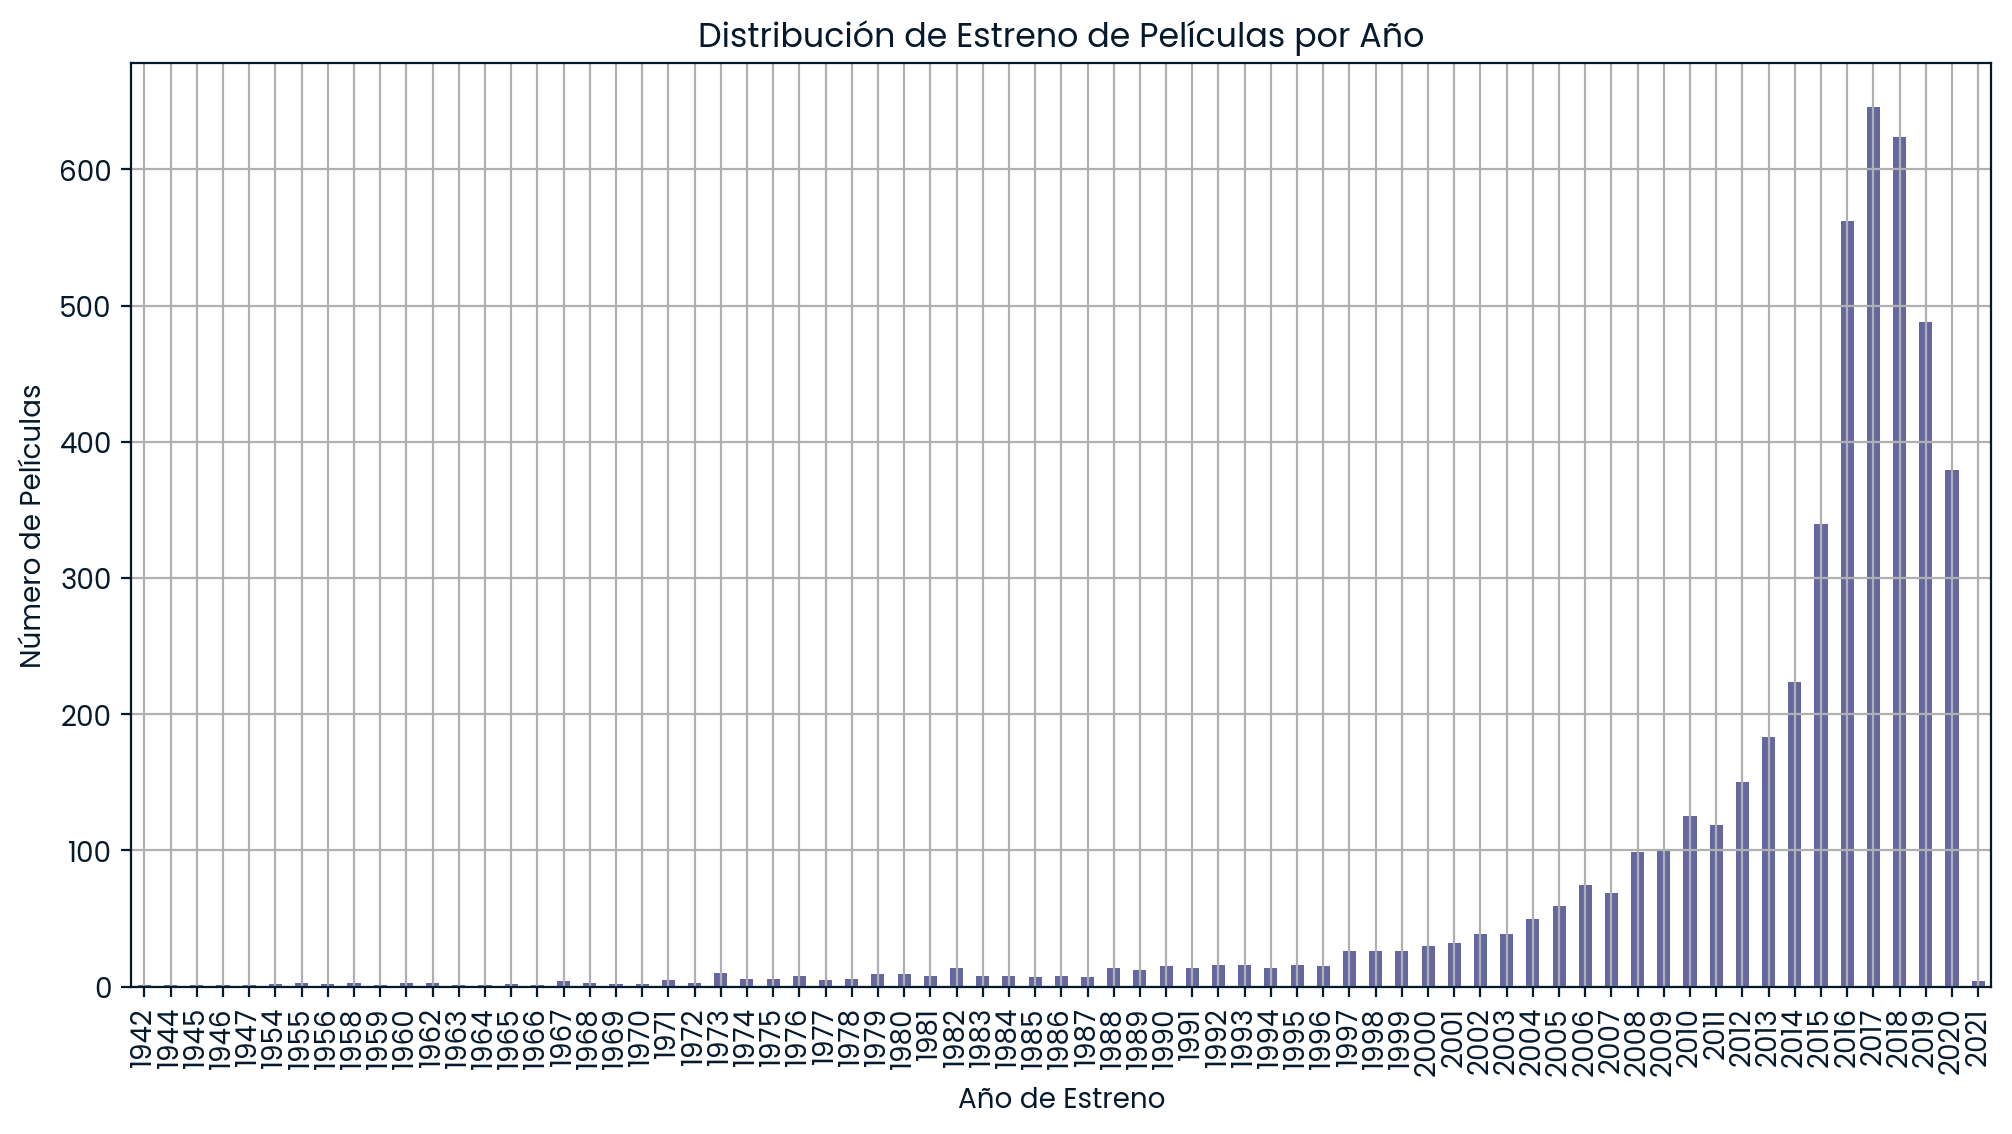

In [ ]:
# Distribcion de peliculas por año
plt.figure(figsize=(12, 6))
netflix_df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Estreno de Películas por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

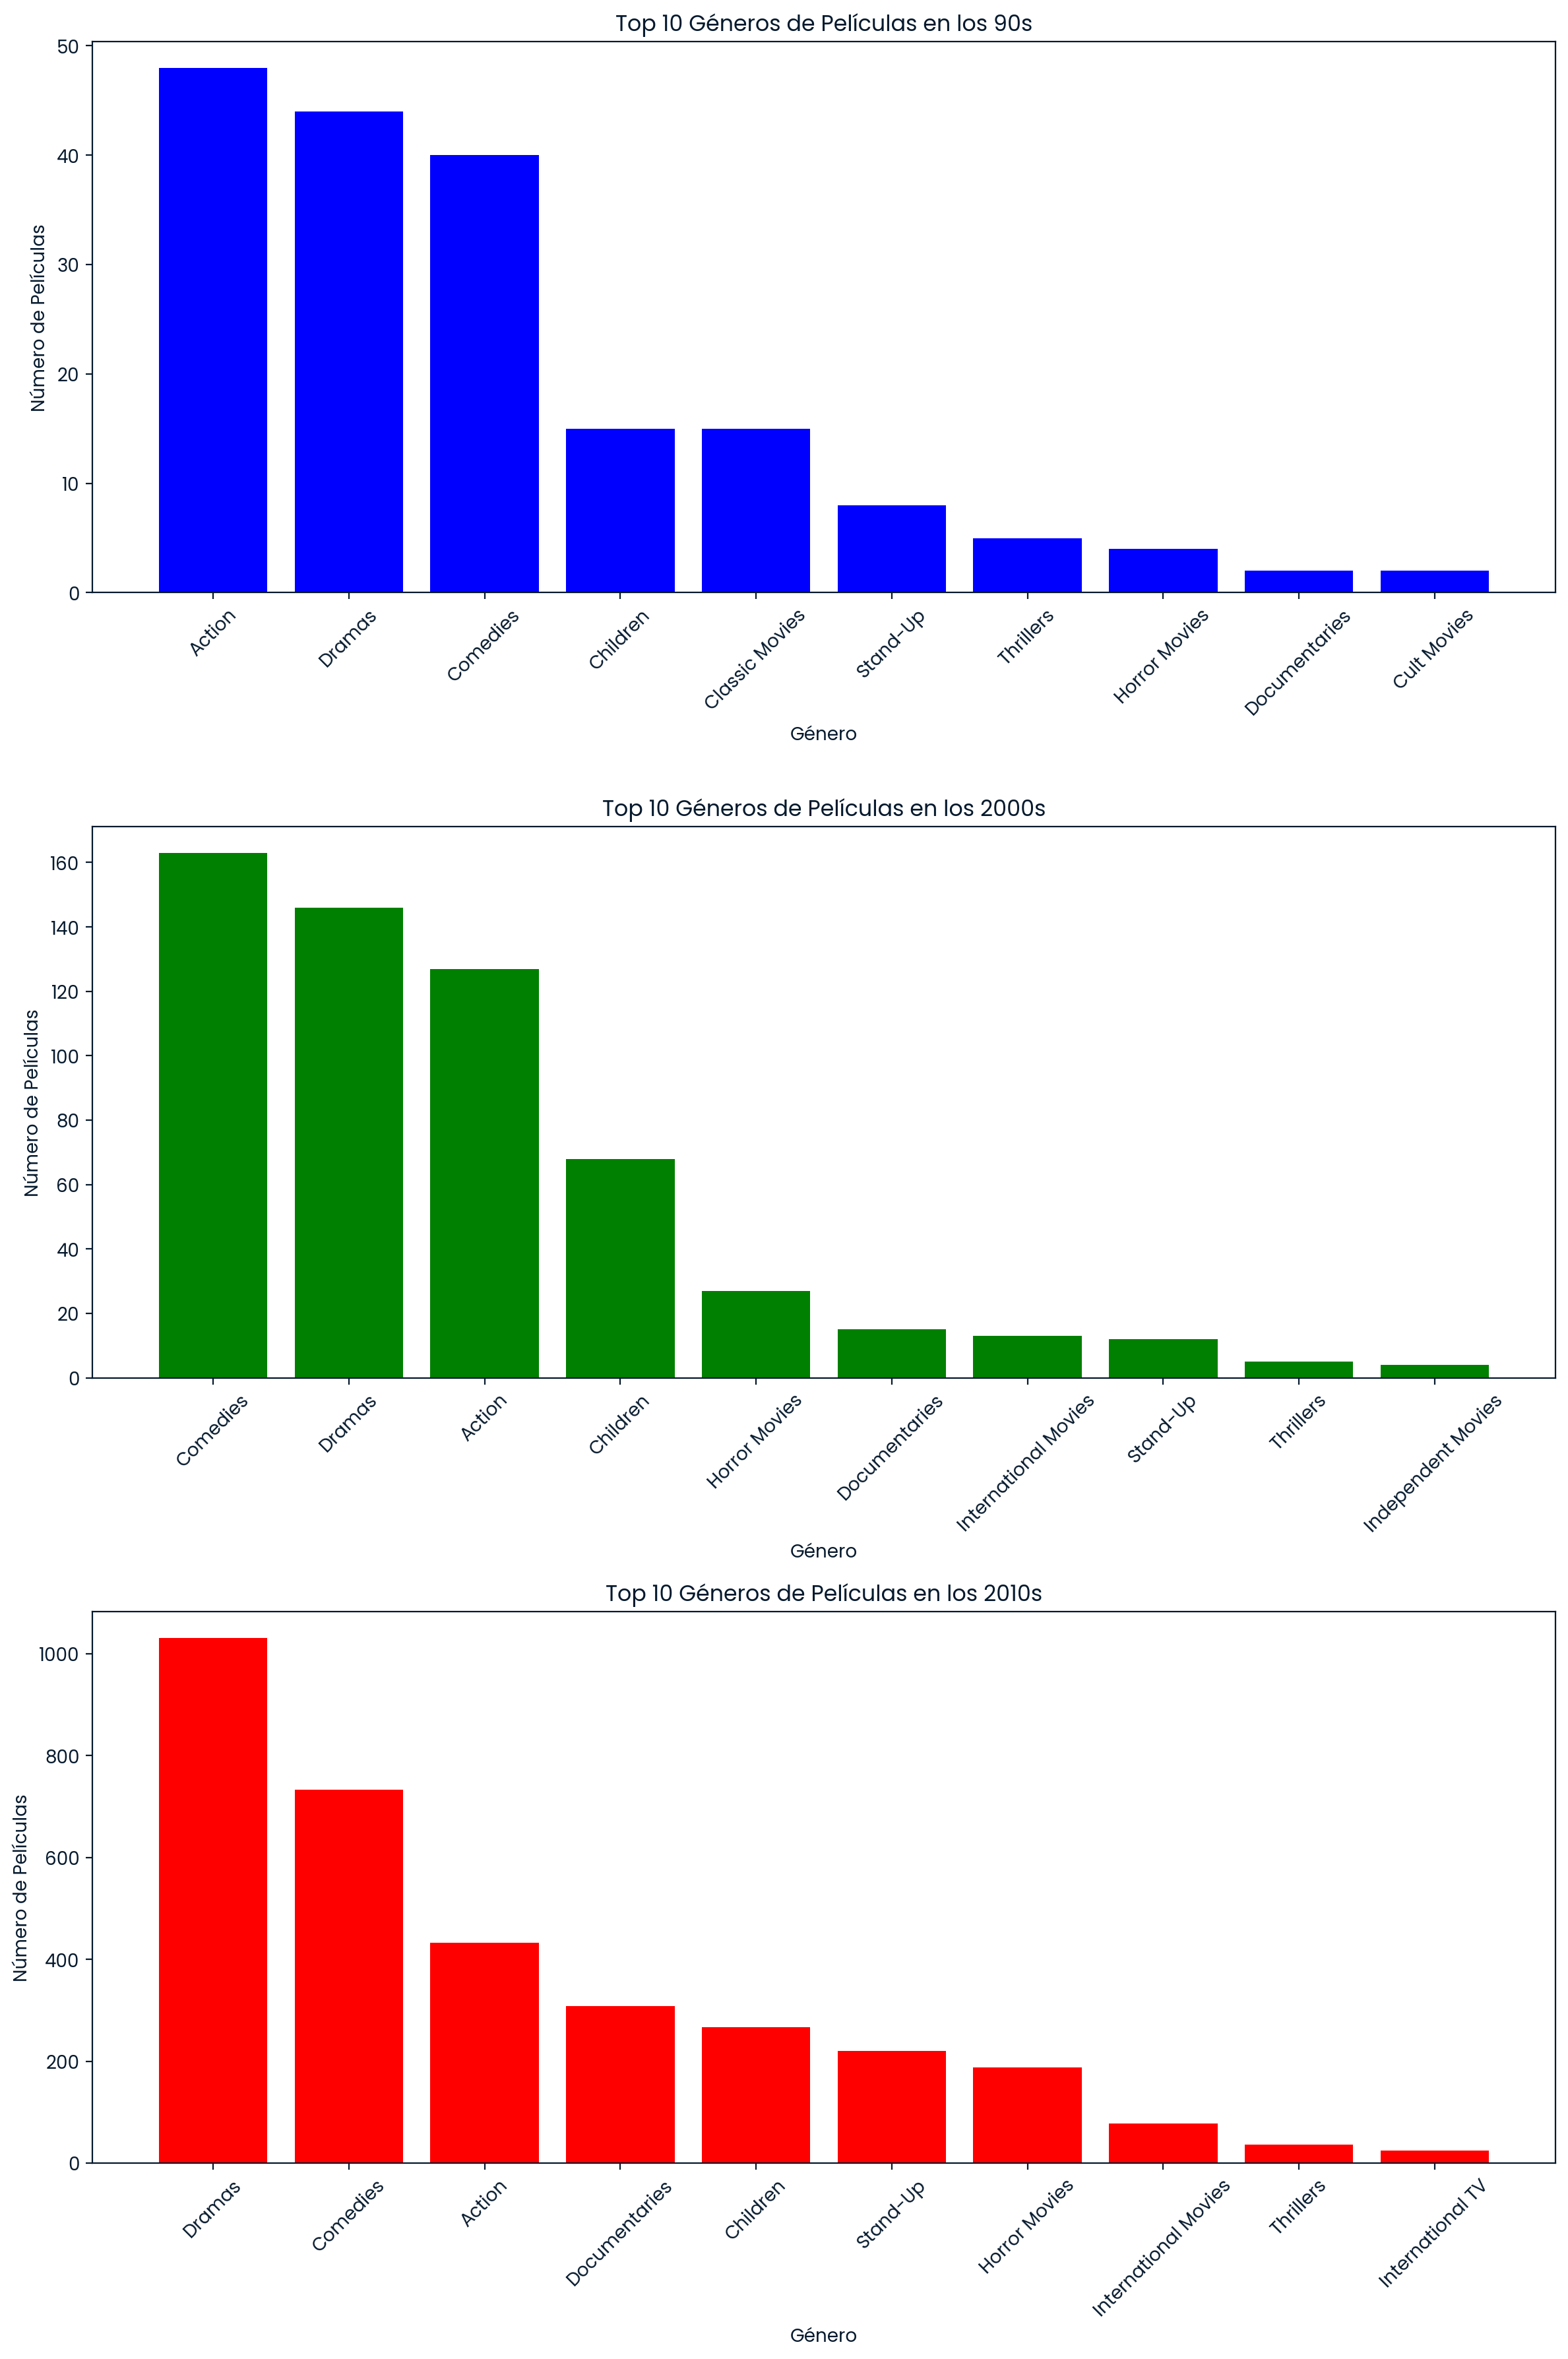

In [ ]:
# Top peliculas por geneero en cada decada
movies_90s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000)]
movies_2000s = netflix_df[(netflix_df['release_year'] >= 2000) & (netflix_df['release_year'] < 2010)]
movies_2010s = netflix_df[(netflix_df['release_year'] >= 2010) & (netflix_df['release_year'] < 2020)]

genre_counts_90s = movies_90s['genre'].value_counts().head(10)
genre_counts_2000s = movies_2000s['genre'].value_counts().head(10)
genre_counts_2010s = movies_2010s['genre'].value_counts().head(10)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

#90s
axes[0].bar(genre_counts_90s.index, genre_counts_90s.values, color='blue')
axes[0].set_title('Top 10 Géneros de Películas en los 90s')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Número de Películas')
axes[0].tick_params(axis='x', rotation=45)

# 2000s
axes[1].bar(genre_counts_2000s.index, genre_counts_2000s.values, color='green')
axes[1].set_title('Top 10 Géneros de Películas en los 2000s')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Número de Películas')
axes[1].tick_params(axis='x', rotation=45)

# 2010s
axes[2].bar(genre_counts_2010s.index, genre_counts_2010s.values, color='red')
axes[2].set_title('Top 10 Géneros de Películas en los 2010s')
axes[2].set_xlabel('Género')
axes[2].set_ylabel('Número de Películas')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Las peliculas mas comunes actualmente son de dramas, pero en los 90s eran de comedia. Las peliculas de accion han sido populares en todas las decadas.

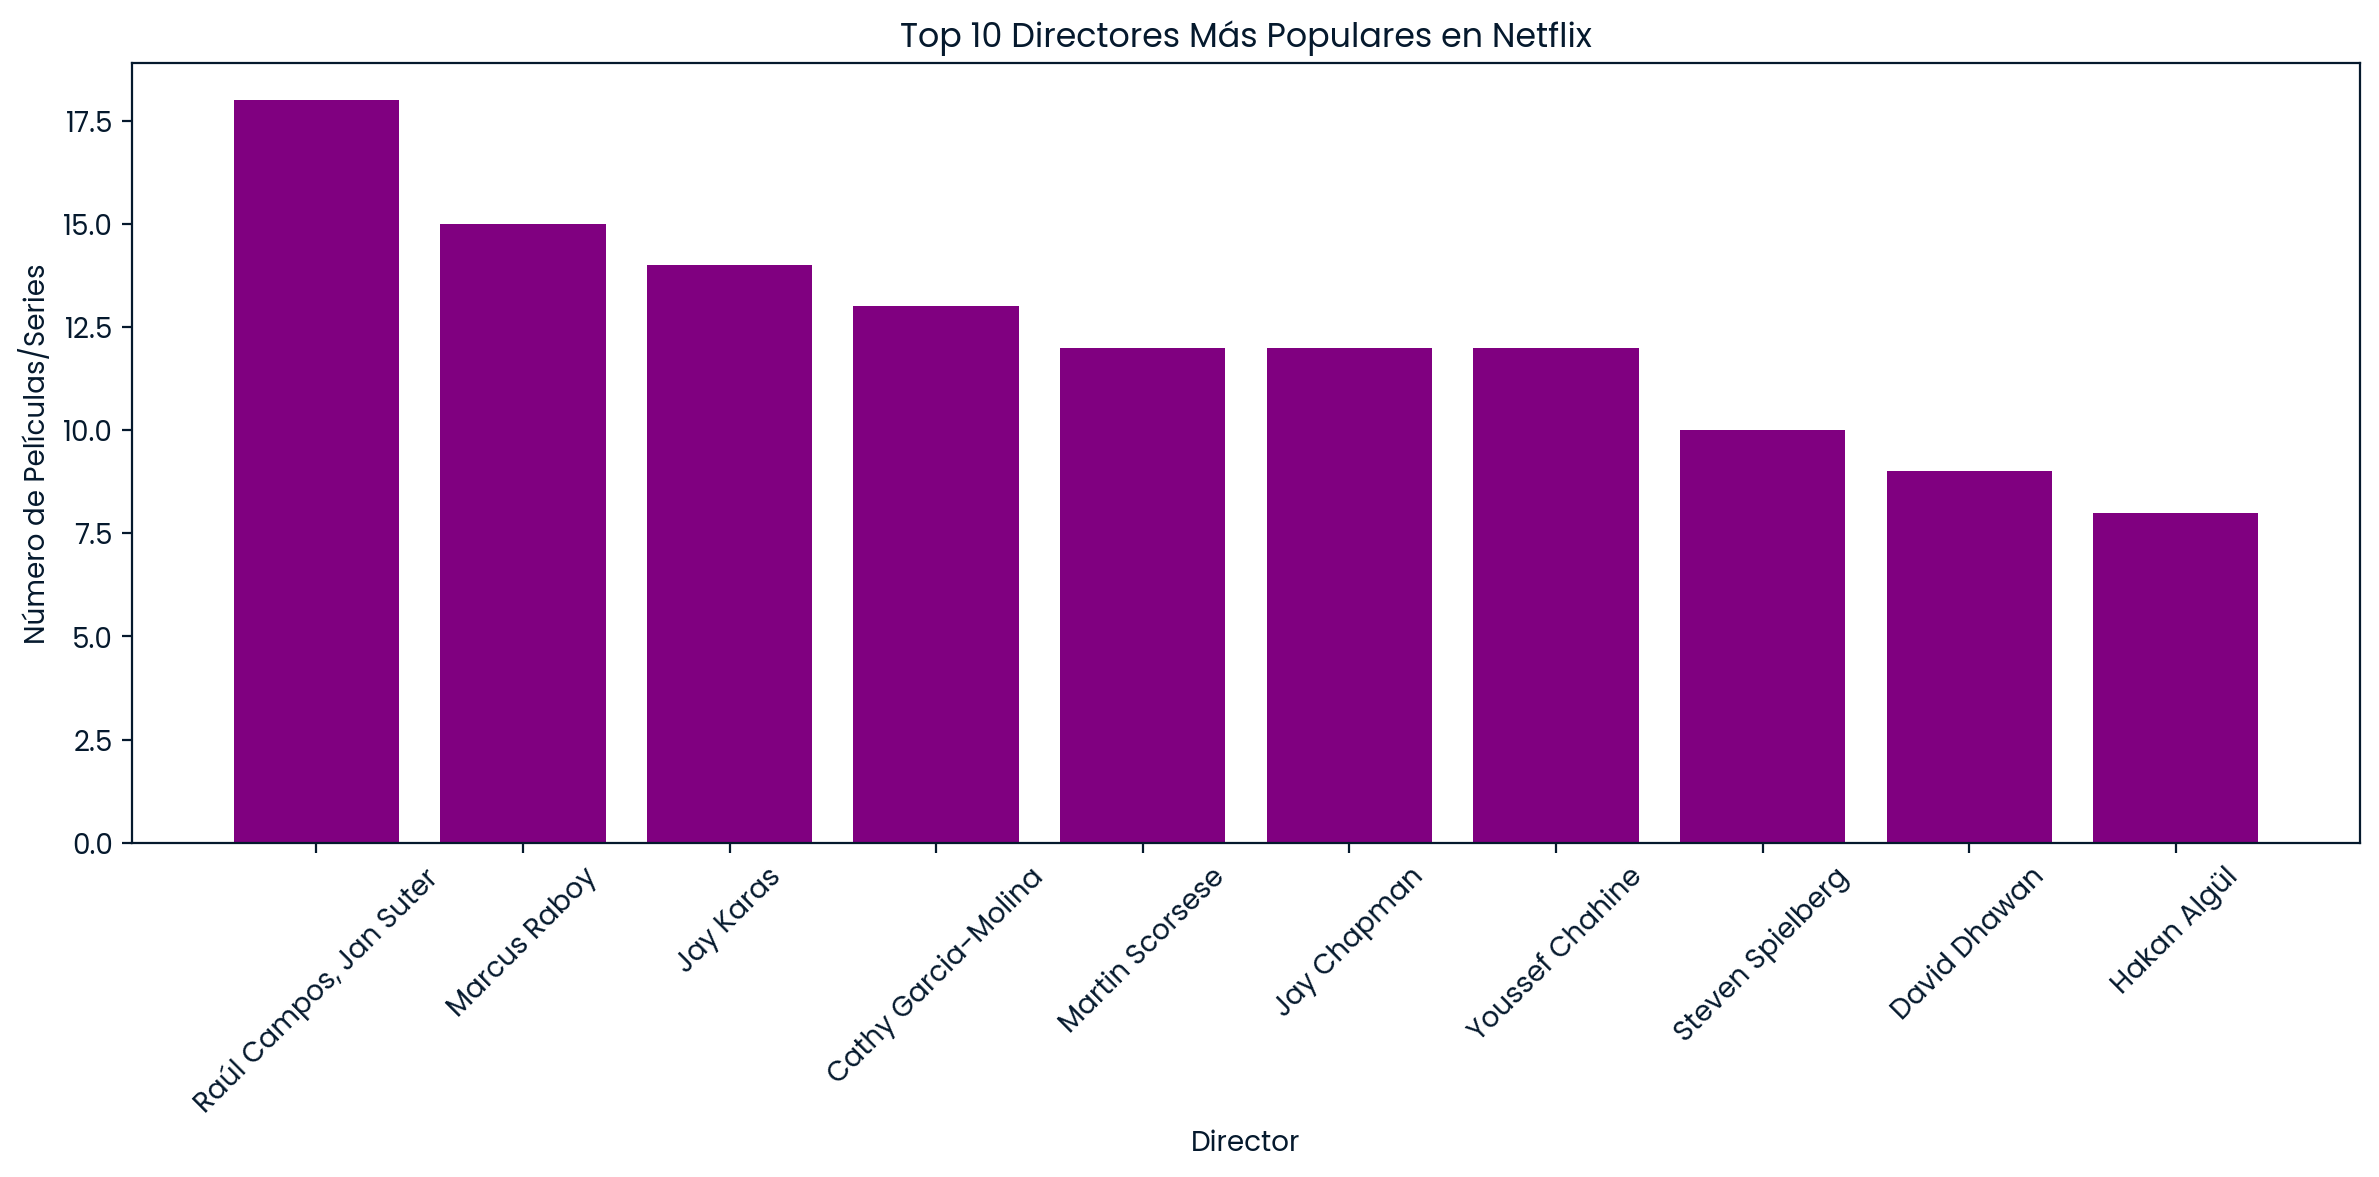

In [ ]:
# top 10 directores más populares de Netflix
director_counts = netflix_df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(director_counts.index, director_counts.values, color='purple')
plt.title('Top 10 Directores Más Populares en Netflix')
plt.xlabel('Director')
plt.ylabel('Número de Películas/Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Raul campos es el director que mas se repite 

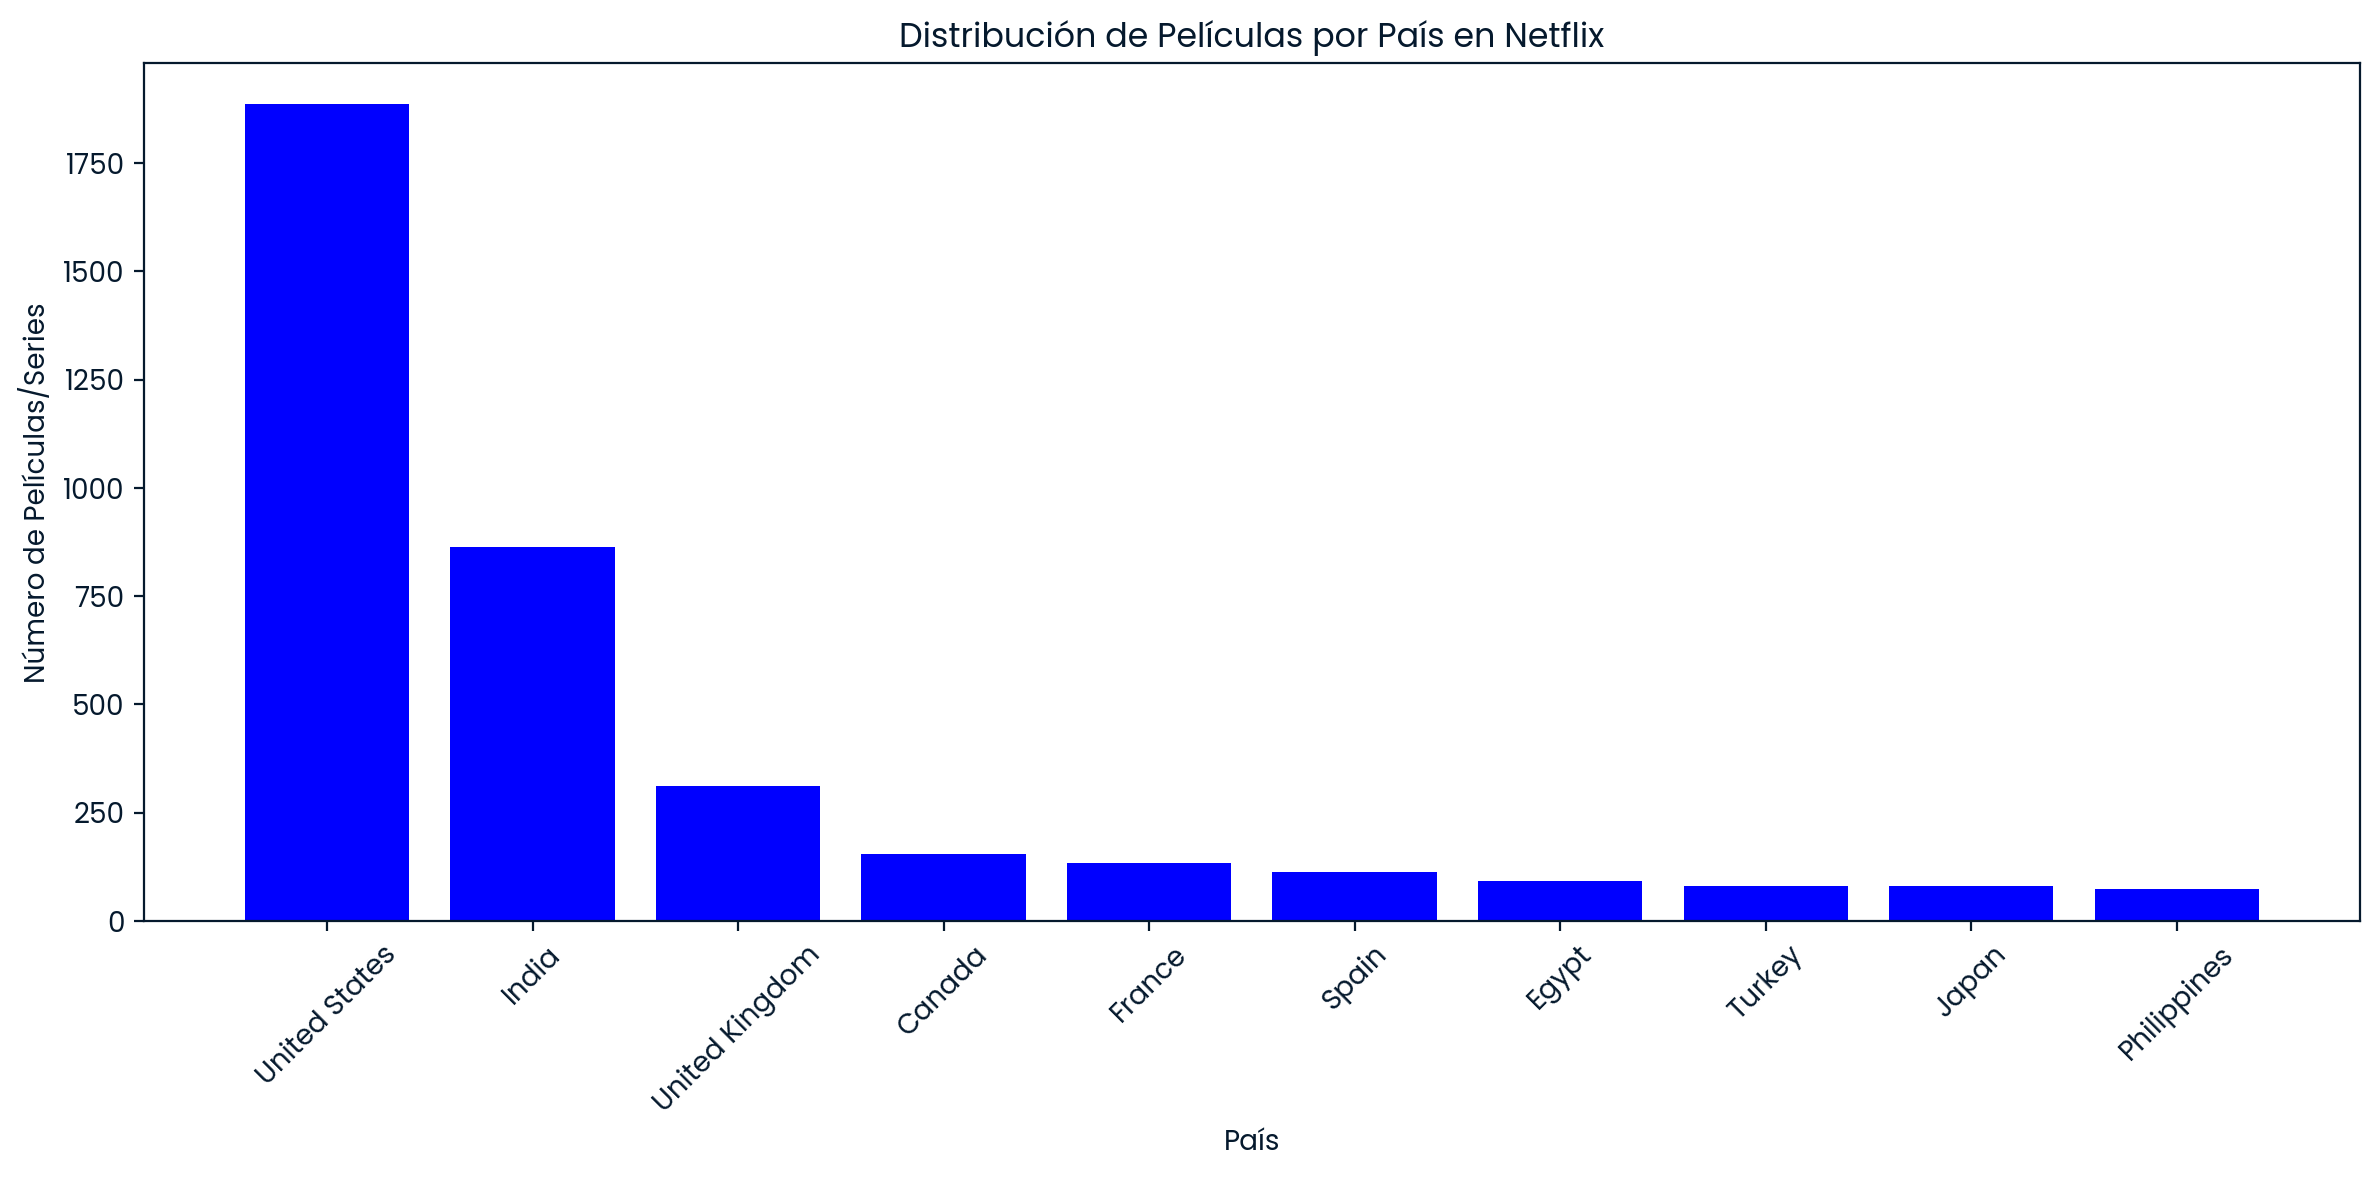

In [ ]:
# Distribución de películas por país
country_counts = netflix_df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values, color='blue')
plt.title('Distribución de Películas por País en Netflix')
plt.xlabel('País')
plt.ylabel('Número de Películas/Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como podemos apreciar las peliculas mas comunes son de estados unidos, india y reino unido